# Пример расчета коэффициента Шарпа.

## Описание:

У. Шарп - математик и экономист, лауреат Нобелевской премии по экономике 1990 года, автор модели ценообразования капитальных активов (CAPM - модель) также разработал т.н. коэффициент Шарпа, позволяющий соотнести доходность акций с волатильностью доходности, или, другими словами, отношение доходности к риску. Коэффициент Шарпа позволяет сравнивать различные активы между собой.

Рассмотрим, как применить коэффициент на примере сравнения акций обыкновенных ПАО Сбербанк и ПАО ВТБ.

## Импортируем библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

## Зададим константу

#### наименования столбцов в импортируемом файле

In [3]:
COLUMNS = ['TICKER', 'PER', 'DATE', 'TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL']

#### год, выбранный в качестве базы для расчета

In [4]:
YEAR = '2021'

#### безрисковая ставку

In [5]:
Rf = 0.09

## Зададим пользовательскте функции

#### Функция парсинга и предобработки файла

In [6]:
def parse_and_preprocess(path):
    data = pd.read_csv(path)
    data.columns = COLUMNS
    data['DATE'] = pd.to_datetime(data['DATE'], format = '%Y%m%d')
    data.sort_values(by = 'DATE', inplace=True)
    data.set_index('DATE', drop = True, inplace=True)
    return data

#### Функция первичного обзора файла

In [7]:
def init_observ(data):
    print('Выведем датафрейм на экран:')
    display(data)
    print('Сводная информация по датафрейму:')
    data.info()
    print('Проверим наличие пропусков данных:')
    print(data.isna().sum())
    print('Распечатаем график цен закрытия:')
    data['CLOSE'].plot(figsize = (15, 9))
    plt.show()

## Загрузка и обзор данных

### Индекс Московской биржи

#### Загрузка

In [8]:
moex = parse_and_preprocess('IMOEX_200101_230308.csv')

In [9]:
moex = moex[YEAR: YEAR]

#### Обзор

Выведем датафрейм на экран:


,TICKER,PER,TIME,OPEN,HIGH,LOW,CLOSE,VOL
DATE,,,,,,,,
2021-01-04,IMOEX,D,0,3304.75,3350.81,3304.17,3350.51,66835524820
2021-01-05,IMOEX,D,0,3326.06,3365.32,3301.88,3359.15,71655035538
2021-01-06,IMOEX,D,0,3375.91,3380.63,3344.43,3371.03,71374633095
2021-01-08,IMOEX,D,0,3399.23,3474.66,3397.15,3454.82,131904843837
2021-01-11,IMOEX,D,0,3449.91,3516.90,3436.66,3482.48,143248254278
...,...,...,...,...,...,...,...,...
2021-12-24,IMOEX,D,0,3698.09,3702.72,3654.17,3702.72,44313579092
2021-12-27,IMOEX,D,0,3713.25,3741.79,3710.04,3740.63,48803438344
2021-12-28,IMOEX,D,0,3768.40,3790.14,3751.37,3777.56,63514063658


Сводная информация по датафрейму:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-01-04 to 2021-12-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TICKER  255 non-null    object 
 1   PER     255 non-null    object 
 2   TIME    255 non-null    int64  
 3   OPEN    255 non-null    float64
 4   HIGH    255 non-null    float64
 5   LOW     255 non-null    float64
 6   CLOSE   255 non-null    float64
 7   VOL     255 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 17.9+ KB
Проверим наличие пропусков данных:
TICKER    0
PER       0
TIME      0
OPEN      0
HIGH      0
LOW       0
CLOSE     0
VOL       0
dtype: int64
Распечатаем график цен закрытия:


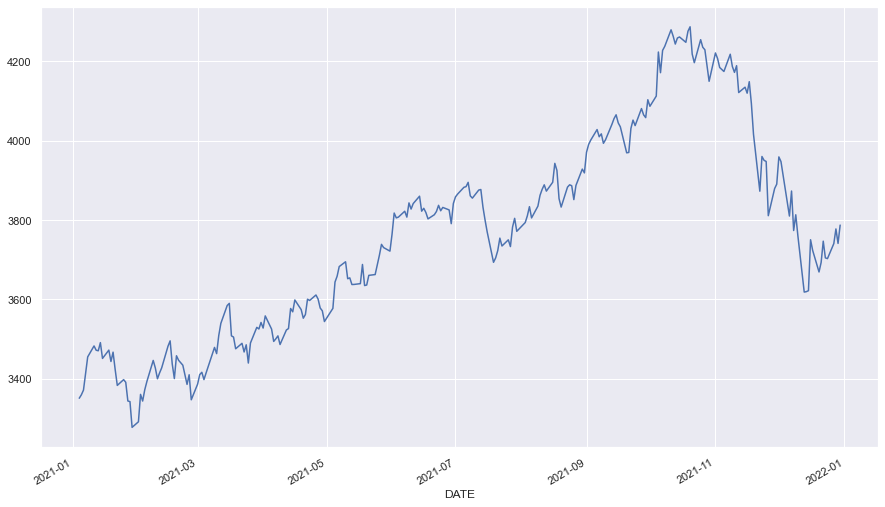

In [10]:
init_observ(moex)

### Сбербанк ао

#### Загрузка

In [11]:
sbrf = parse_and_preprocess('SBER_200101_230308.csv')

In [12]:
sbrf = sbrf[YEAR: YEAR]

#### Обзор датафрейма

Выведем датафрейм на экран:


,TICKER,PER,TIME,OPEN,HIGH,LOW,CLOSE,VOL
DATE,,,,,,,,
2021-01-04,SBER,D,0,274.67,276.60,270.61,272.00,48799460
2021-01-05,SBER,D,0,272.67,275.70,270.28,275.20,45554100
2021-01-06,SBER,D,0,275.90,275.92,271.62,272.93,40905340
2021-01-08,SBER,D,0,275.11,283.99,275.11,283.64,88672940
2021-01-11,SBER,D,0,282.75,292.95,279.48,289.49,112210400
...,...,...,...,...,...,...,...,...
2021-12-24,SBER,D,0,293.00,294.18,289.00,293.89,37669750
2021-12-27,SBER,D,0,294.79,296.00,293.37,295.68,35728530
2021-12-28,SBER,D,0,295.84,297.55,294.18,295.00,37853360


Сводная информация по датафрейму:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-01-04 to 2021-12-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TICKER  255 non-null    object 
 1   PER     255 non-null    object 
 2   TIME    255 non-null    int64  
 3   OPEN    255 non-null    float64
 4   HIGH    255 non-null    float64
 5   LOW     255 non-null    float64
 6   CLOSE   255 non-null    float64
 7   VOL     255 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 17.9+ KB
Проверим наличие пропусков данных:
TICKER    0
PER       0
TIME      0
OPEN      0
HIGH      0
LOW       0
CLOSE     0
VOL       0
dtype: int64
Распечатаем график цен закрытия:


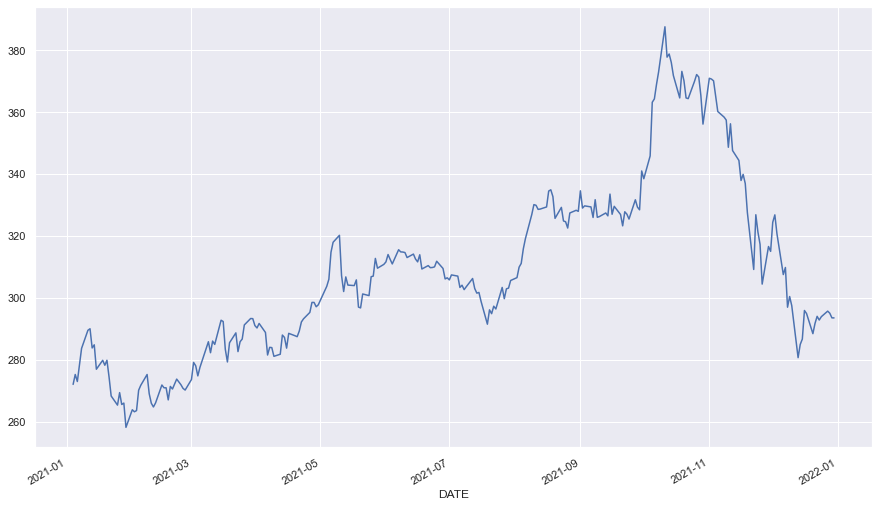

In [13]:
init_observ(sbrf)

### ВТБ

#### Загрузка

In [14]:
vtb = parse_and_preprocess('VTBR_200101_230308.csv')

In [15]:
vtb = vtb[YEAR: YEAR]

#### Обзор датафрейма

Выведем датафрейм на экран:


,TICKER,PER,TIME,OPEN,HIGH,LOW,CLOSE,VOL
DATE,,,,,,,,
2021-01-04,VTBR,D,0,0.038025,0.038520,0.037800,0.037925,23826040000
2021-01-05,VTBR,D,0,0.037935,0.038600,0.037855,0.038445,28782590000
2021-01-06,VTBR,D,0,0.038525,0.038595,0.038050,0.038235,25428390000
2021-01-08,VTBR,D,0,0.038520,0.039095,0.038445,0.038940,39504750000
2021-01-11,VTBR,D,0,0.038740,0.040050,0.038410,0.039890,60293350000
...,...,...,...,...,...,...,...,...
2021-12-24,VTBR,D,0,0.047225,0.047345,0.046205,0.047090,34994850000
2021-12-27,VTBR,D,0,0.047035,0.048050,0.047010,0.047730,47058120000
2021-12-28,VTBR,D,0,0.047820,0.048450,0.047675,0.048395,48831590000


Сводная информация по датафрейму:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-01-04 to 2021-12-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TICKER  255 non-null    object 
 1   PER     255 non-null    object 
 2   TIME    255 non-null    int64  
 3   OPEN    255 non-null    float64
 4   HIGH    255 non-null    float64
 5   LOW     255 non-null    float64
 6   CLOSE   255 non-null    float64
 7   VOL     255 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 17.9+ KB
Проверим наличие пропусков данных:
TICKER    0
PER       0
TIME      0
OPEN      0
HIGH      0
LOW       0
CLOSE     0
VOL       0
dtype: int64
Распечатаем график цен закрытия:


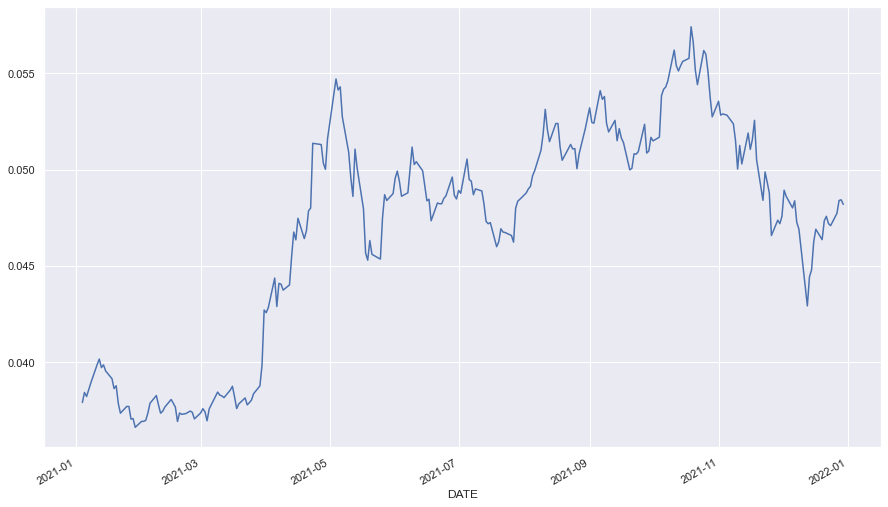

In [16]:
init_observ(vtb)

## Расчет дневных доходностей

In [17]:
moex['returns'] = moex['CLOSE'].pct_change()

In [18]:
sbrf['returns'] = sbrf['CLOSE'].pct_change()

In [19]:
vtb['returns'] = vtb['CLOSE'].pct_change()

## Оставим только те дни, за которые имеются котировки и по индексу и по акциям.

In [20]:
moex = moex.dropna()

In [21]:
sbrf = sbrf.dropna()

In [22]:
vtb = vtb.dropna()

In [23]:
sbrf, vtb = sbrf.align(vtb, join = 'inner', axis = 0)

In [24]:
moex, sbrf = moex.align(sbrf, join = 'inner', axis = 0)

In [25]:
moex, vtb = moex.align(vtb, join = 'inner', axis = 0)

## Раccчитаем средние дневные доходности индекса и акций.

In [26]:
moex_avg_d = moex['returns'].mean()

In [27]:
sbrf_avg_d = sbrf['returns'].mean()

In [28]:
vtb_avg_d = vtb['returns'].mean()

In [29]:
print(moex_avg_d, sbrf_avg_d, vtb_avg_d)

0.0005349164771975517 0.0004310774549513196 0.0011230592364865934


## Раccчитаем годовые доходности индекса и акций.

In [30]:
moex_avg = ((1 + moex_avg_d) ** 250) - 1

In [31]:
sbrf_avg = ((1 + sbrf_avg_d) ** 250) - 1

In [32]:
vtb_avg = ((1 + vtb_avg_d) ** 250) - 1

In [33]:
print(moex_avg, sbrf_avg, vtb_avg)

0.14304226924363195 0.11376497128049068 0.32393355247840394


## Раccчитаем превышение доходностей акций и индекса над безрисковой ставкой.

In [34]:
moex_excess = moex_avg - Rf

In [35]:
sbrf_excess = sbrf_avg - Rf

In [36]:
vtb_excess = vtb_avg - Rf

In [37]:
print(moex_excess, sbrf_excess, vtb_excess)

0.05304226924363195 0.023764971280490682 0.23393355247840394


## Расчет стандартных отклонений дневных доходностей. Расчет среднегодовой волатильности.

In [38]:
moex_sd = moex['returns'].std() * np.sqrt(250)

In [39]:
sbrf_sd = sbrf['returns'].std() * np.sqrt(250)

In [40]:
vtb_sd = vtb['returns'].std() * np.sqrt(250)

In [41]:
print(moex_sd, sbrf_sd, vtb_sd)

0.16197866709771763 0.2569541419329556 0.30056956239886257


## Расчет к-та Шарпа.

In [42]:
moex_sharpe_ratio = moex_excess / moex_sd

In [43]:
sbrf_sharpe_ratio = sbrf_excess / sbrf_sd

In [44]:
vtb_sharpe_ratio = vtb_excess / vtb_sd

In [45]:
print(moex_sharpe_ratio, sbrf_sharpe_ratio, vtb_sharpe_ratio)

0.3274645371148343 0.09248720842449557 0.7783008718892462


## Выводы:

Преимущество к-та Шарпа помимо прочего в том, что он может (в отличие от бета - коэффициента) оценить соотношение доходности к риску для рыночного портфеля (в нашем случае индексного). Напомним, бета-коэффициент рыночного (индексного) портфеля всегда равен единице.

Таким образом, к-т Шарпа позволяет сравнить между собой любые комбинации альтернативных портфелей (в том числе состоящих из отдельно взятой акции).

В нашем случае минимальный к-т Шарпа имеют акции Сбербанка, большее соотношение доходности к риску предлагает индексный портфель и максимальное в нашем примере соотношение доходности к риску имеют акции ВТБ.